In [1]:
# 구글 드라이브와 연동하는 방법 입니다. 
# Google File Drive Stream 접근을 허용해야 합니다.
from google.colab import auth
auth.authenticate_user()

# 구글 드라이브 mount 
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
# 1. 홈 디렉토리에 datasets 폴더 생성 후, 그 안에 cats_and_dogs_small 폴더를 생성 합니다.
# 2. cats_and_dogs_small 안에 train, test, validation 폴더가 위치 하도록 압축을 풉니다.
cd gdrive/My Drive/datasets/augmentation

/content/gdrive/My Drive/datasets/augmentation


In [3]:
!ls

test  train  validation


In [0]:
import numpy as np
import scipy
import cv2 as cv
from google.colab.patches import cv2_imshow

location = './train/dogs/dog.0.jpg'

img1 = cv.imread(location)
print img1.shape
if img1 is None:
  print('Image load failed!')

flip_down = np.flipud(img1)

cv2_imshow(flip_down)
cv.imwrite('./train/dogs/dog.5.jpg', flip_down)

(375, 499, 3)


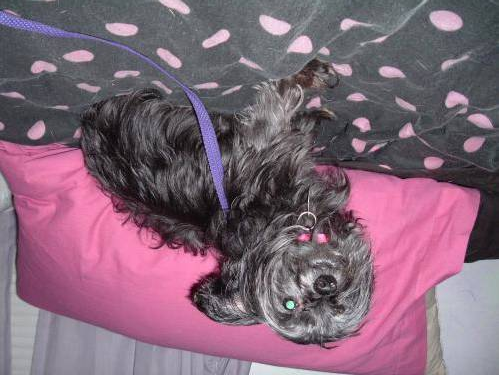

True

In [0]:
import os
location = './train/dogs/'
image_list = os.listdir(location)

In [10]:
image_list

['dog.0.jpg',
 'dog.2.jpg',
 'dog.3.jpg',
 'dog.1.jpg',
 'dog.4.jpg',
 'dog.6.jpg',
 'dog.7.jpg',
 'dog.8.jpg',
 'dog.9.jpg',
 'dog.5.jpg',
 'dog.10.jpg',
 'dog.11.jpg',
 'dog.12.jpg',
 'dog.13.jpg',
 'dog.14.jpg']

In [0]:
index = np.random.choice(len(image_list), 5)
print index

[1 4 8 6 3]


./train/dogs/dog.10.jpg


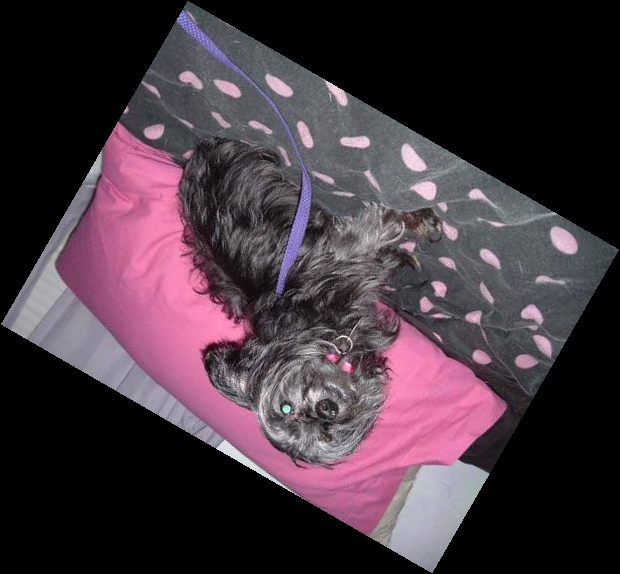

./train/dogs/dog.1.jpg


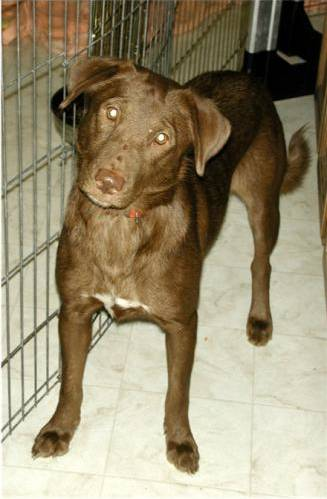

./train/dogs/dog.3.jpg


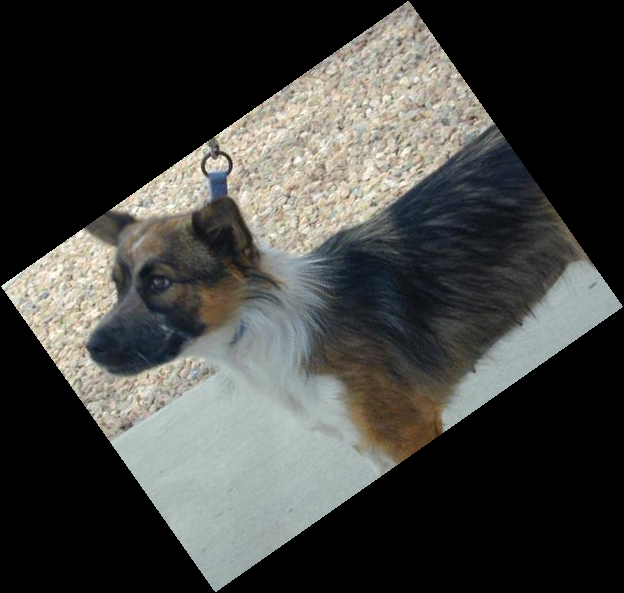

./train/dogs/dog.7.jpg


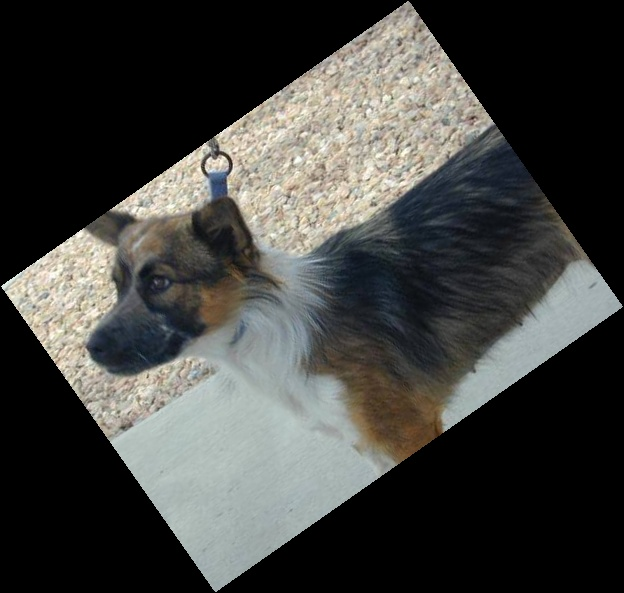

./train/dogs/dog.4.jpg


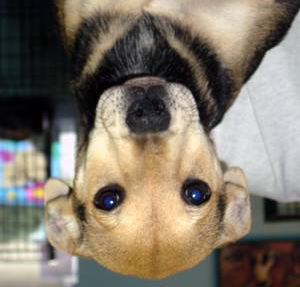

In [13]:
from scipy import ndimage
import numpy as np
import scipy
import cv2 as cv
from google.colab.patches import cv2_imshow

index = np.random.choice(len(image_list), 5, replace=False)

count = 0
for i in index:
  
  location = './train/dogs/dog.{}.jpg'.format(i)
  print location
  
  image = cv.imread(location)
  
  if i % 2 == 0:
    image = np.flipud(image)
  elif i % 3 == 0 :
    image = ndimage.rotate(image, np.random.choice(45, 1)[0])
  elif i % 5 == 0:
    image = ndimage.gaussian_filter(image, sigma=np.random.choice(5, 1)[0])
    
  location = './train/dogs/dog.{}.jpg'.format((len(index)+count))
  cv.imwrite(location, image)
  count += 1
  

In [0]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

# 모든 이미지를 1/255로 스케일을 조정합니다
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

base_dir = '/content/gdrive/My Drive/datasets/augmentation'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')


train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지를 224 × 224 크기로 바꿉니다
        target_size=(224, 224),
        batch_size=20,
        # binary_crossentropy 손실을 사용하기 때문에 이진 레이블이 필요합니다
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1206 images belonging to 2 classes.


In [0]:
for data_batch, labels_batch in train_generator:
    print 'Batch size:', data_batch.shape
    print 'Label size:', labels_batch.shape
    break

Batch size: (20, 224, 224, 3)
Label size: (20,)


In [0]:
#  This code cell shows how to utilize VGG16 model by combining Dense layer at the end of the network 
from keras.layers import Input, Dense, GlobalAveragePooling2D, Flatten
from keras.models import Model

from keras.applications.vgg16 import VGG16
from keras import layers
from keras import models

VGGNet = VGG16()

# VGGNet.summary()

# We will not update VGG pre-trained model, only added Dense layers will be trained from the scratch
for layer in VGGNet.layers:
  layer.trainable = False
  
vgg_maxpool5 = VGGNet.get_layer('block5_pool').output

Feature_Flatten = Flatten()(vgg_maxpool5)
dense = Dense(10, name='dense', activation='relu')(Feature_Flatten)
predictions = Dense(1, activation='sigmoid')(dense)
New_VGGmodel = Model(inputs=VGGNet.input, outputs=predictions)
New_VGGmodel.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

New_VGGmodel.summary()
  

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
history = New_VGGmodel.fit_generator(
      train_generator,
      steps_per_epoch=10,
      epochs=30,
      )

Epoch 1/30
10/10 [==============================] - 6s 603ms/step - loss: 1.1008 - acc: 0.5550
Epoch 2/30
10/10 [==============================] - 2s 225ms/step - loss: 0.5514 - acc: 0.7100
Epoch 3/30
10/10 [==============================] - 2s 226ms/step - loss: 0.5103 - acc: 0.7600
Epoch 4/30
10/10 [==============================] - 2s 227ms/step - loss: 0.4502 - acc: 0.8200
Epoch 5/30
10/10 [==============================] - 2s 226ms/step - loss: 0.4495 - acc: 0.7950
Epoch 6/30
10/10 [==============================] - 2s 226ms/step - loss: 0.3870 - acc: 0.8350
Epoch 7/30
10/10 [==============================] - 2s 226ms/step - loss: 0.2924 - acc: 0.9250
Epoch 8/30
10/10 [==============================] - 2s 226ms/step - loss: 0.3773 - acc: 0.8300
Epoch 9/30
10/10 [==============================] - 2s 227ms/step - loss: 0.3064 - acc: 0.8650
Epoch 10/30
10/10 [==============================] - 2s 227ms/step - loss: 0.3283 - acc: 0.8400
Epoch 11/30
10/10 [==============================

In [0]:
New_VGGmodel.save('MyVGGNet.h5')